Importing the necessary libraries that are needed.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [10]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [12]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [13]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [14]:
df=df.dropna(subset=['Satisfaction Level'])
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [15]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [16]:
df.nunique()

Customer ID                 348
Gender                        2
Age                          16
City                          6
Membership Type               3
Total Spend                  76
Items Purchased              15
Average Rating               20
Discount Applied              2
Days Since Last Purchase     54
Satisfaction Level            3
dtype: int64

DATA VISUALIZATION:
Understanding the patterns in the data

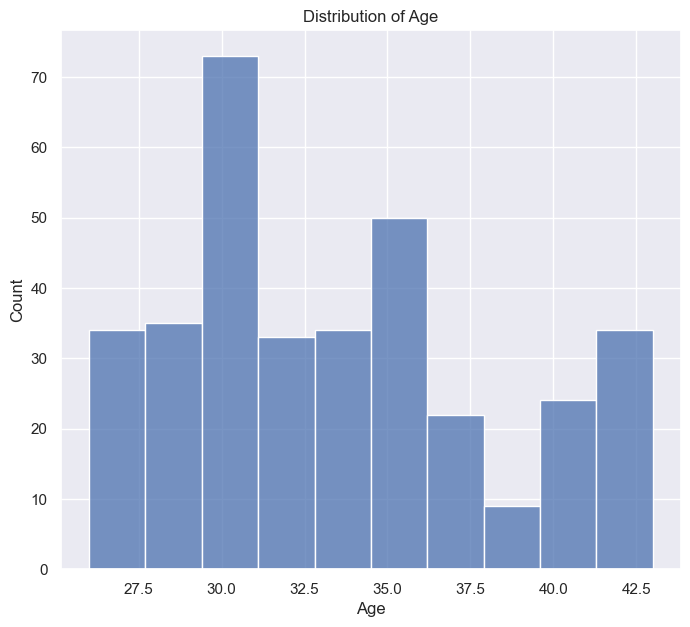

In [17]:
sns.set()
plt.figure(figsize=(8,7))
sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

In [18]:
df['Age'].value_counts()

Age
30    48
32    33
31    25
43    25
35    25
27    25
36    25
34    24
28    24
41    24
37    22
29    11
33    10
42     9
26     9
38     9
Name: count, dtype: int64

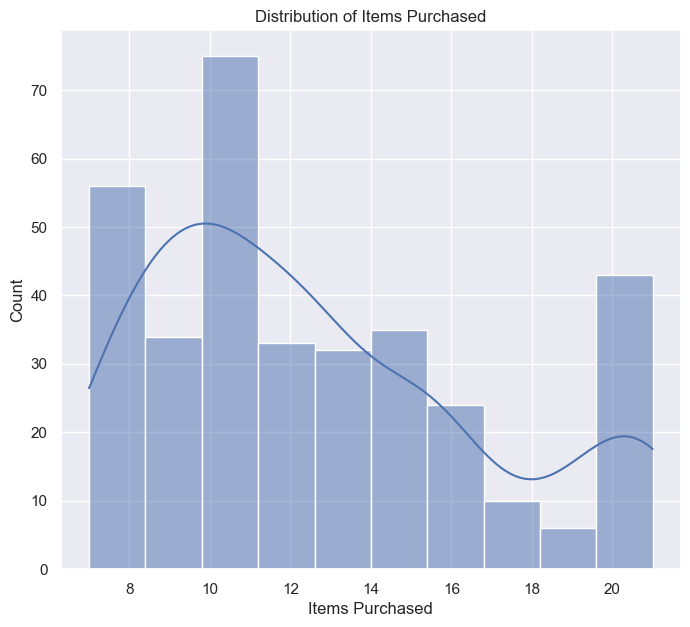

In [19]:
sns.set()
plt.figure(figsize=(8,7))
sns.histplot(df['Items Purchased'],kde=True)
plt.title('Distribution of Items Purchased')
plt.show()

In [20]:
df['Items Purchased'].value_counts()

Items Purchased
10    47
9     34
8     33
12    33
13    32
11    28
15    24
21    24
16    24
7     23
20    19
14    11
18     9
19     6
17     1
Name: count, dtype: int64

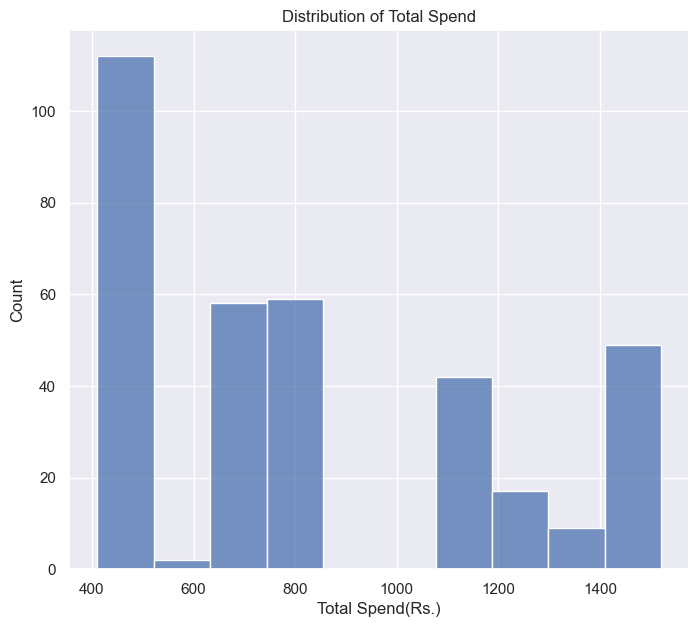

Total Spend
710.40     15
470.50     12
505.75     12
820.90     12
1140.60    11
1490.10    11
430.80     11
1190.80    11
1460.50    10
790.20      9
Name: count, dtype: int64

In [21]:
sns.set()
plt.figure(figsize=(8,7))
sns.histplot(df['Total Spend'])
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend(Rs.)')
plt.show()
df['Total Spend'].value_counts().head(10)

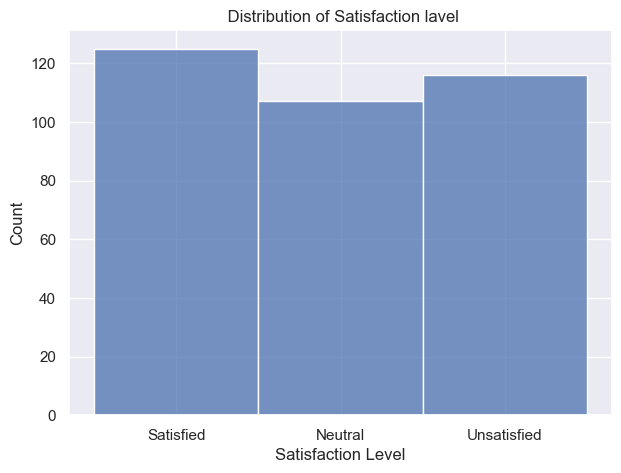

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(df['Satisfaction Level'])
plt.title(' Distribution of Satisfaction lavel')
plt.show()
df['Satisfaction Level'].value_counts()

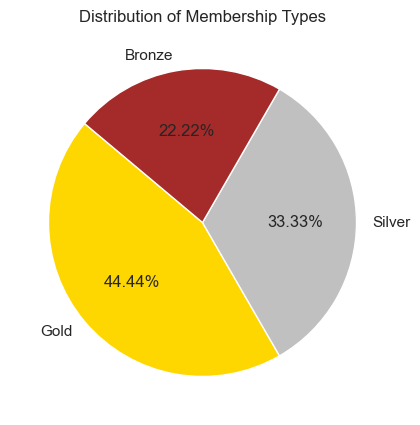

Membership Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64

In [23]:
data = pd.DataFrame({'Membership Type': ['Gold', 'Silver', 'Bronze', 'Gold', 'Silver', 'Bronze', 'Gold', 'Silver', 'Gold']})
membership_counts = data['Membership Type'].value_counts()
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}
plt.figure(figsize=(7, 5))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.2f%%', startangle=140, colors=[colors[key] for key in membership_counts.index])
plt.title('Distribution of Membership Types')
plt.show()
df['Membership Type'].value_counts()



In [24]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [25]:
df.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['City'] = encoder.fit_transform(df['City'])
df['Gender']=encoder.fit_transform(df['Gender'])
df['Membership Type']=encoder.fit_transform(df['Membership Type'])
df['Satisfaction Level']=encoder.fit_transform(df['Satisfaction Level'])
df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,True,25,1
1,102,1,34,2,2,780.50,11,4.1,False,18,0
2,103,0,43,0,0,510.75,9,3.4,True,42,2
3,104,1,30,5,1,1480.30,19,4.7,False,12,1
4,105,1,27,3,2,720.40,13,4.0,True,55,2


In [27]:
scaler=StandardScaler()
num_cols = ['Age','Total Spend','Items Purchased','Average Rating','Discount Applied','Days Since Last Purchase']
df[num_cols]= scaler.fit_transform(df[num_cols])
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,-0.939761,4,1,0.754230,0.330381,0.996757,0.994269,-0.120022,1
1,102,1,0.086720,2,2,-0.186319,-0.394236,0.132172,-1.005764,-0.640260,0
2,103,0,1.934386,0,0,-0.933192,-0.877314,-1.078247,0.994269,1.143413,2
3,104,1,-0.734465,5,1,1.751261,1.538076,1.169674,-1.005764,-1.086179,1
4,105,1,-1.350354,3,2,-0.352721,0.088842,-0.040745,0.994269,2.109570,2


In [28]:
X = df.drop(columns=['Satisfaction Level','City','Customer ID','Gender','Membership Type'],axis=1)
y=df['Satisfaction Level']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(278, 6)

In [30]:
X_test.shape

(70, 6)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)

# Evaluate the model
accuracy =accuracy_score(y_test, pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, pred))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        20

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [32]:
import pickle as pkl

In [35]:
pkl.dump(model,open('MIMPL.pkl','wb'))
pkl.dump(scaler,open('scaler.pkl','wb'))